In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from numpy import array
import plotly as go

ModuleNotFoundError: No module named 'plotly'

 #!/usr/bin/python
    import time
    import datetime
    import logging
    
    logger = logging.getLogger()
    
    def setup_file_logger(log_file):
        hdlr = logging.FileHandler(log_file)
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        hdlr.setFormatter(formatter)
        logger.addHandler(hdlr) 
        logger.setLevel(logging.INFO)
    
    def log(message):
        #outputs to Jupyter console
        print('{} {}'.format(datetime.datetime.now(), message))
        #outputs to file
        logger.info(message)
    
    setup_file_logger('out.log')
    
    for i in range(10000):
        log('Doing hard work here i=' + str(i))
        log('Taking a nap now...')
        time.sleep(1000)


In [3]:
flights=pd.read_csv('flights.csv', low_memory=False)

In [3]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [5]:
flights["CANCELLED"].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [6]:
#Peu de vols étaient annulés!

In [7]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
#Création d'un ensemble de test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#train_set, test_set=train_test_split(flights, test_size=0.2, random_state=42) Here we risk introducing a sampling bias

In [11]:
#Thus we use Stratified Shuffle Split to obtain a homogeneous sampling

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
#1)Split based on origin airport

In [14]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(flights, flights["ORIGIN_AIRPORT"]):
    strat_test=flights.loc[test_index]
    strat_train=flights.loc[train_index]


In [15]:
flights["ORIGIN_AIRPORT"].value_counts()/len(flights["ORIGIN_AIRPORT"])

ATL      5.960325e-02
ORD      4.912874e-02
DFW      4.116648e-02
DEN      3.369176e-02
LAX      3.345426e-02
SFO      2.543495e-02
PHX      2.522994e-02
IAH      2.519677e-02
LAS      2.288696e-02
MSP      1.926714e-02
MCO      1.907209e-02
SEA      1.905783e-02
DTW      1.864556e-02
BOS      1.853335e-02
EWR      1.748937e-02
CLT      1.724053e-02
LGA      1.711697e-02
SLC      1.670539e-02
JFK      1.612128e-02
BWI      1.479255e-02
MDW      1.390014e-02
DCA      1.268139e-02
FLL      1.265217e-02
SAN      1.206497e-02
MIA      1.191615e-02
PHL      1.134561e-02
TPA      1.098215e-02
DAL      1.025918e-02
HOU      8.943340e-03
BNA      8.176552e-03
             ...     
11617    9.451668e-06
12255    9.107971e-06
12343    9.107971e-06
13127    9.107971e-06
10918    9.107971e-06
10333    9.107971e-06
12888    9.107971e-06
12177    9.107971e-06
10739    9.107971e-06
11587    9.107971e-06
14109    9.107971e-06
11525    9.107971e-06
11447    8.420577e-06
13964    6.186546e-06
ITH      5

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [103]:
faa_code=pd.read_csv("faa_code-Copy1.csv", low_memory=False).loc[:,["Code","AIRPORT"]]
airports=pd.read_csv("airports.csv", low_memory=False).loc[:,["IATA_CODE","AIRPORT"]]

In [104]:
faa_code.head()

,Code,AIRPORT
0,10001,Afognak Lake
1,10003,Bear Creek Mining Strip
2,10004,Lik Mining Camp
3,10005,Little Squaw
4,10006,Kizhuyak Bay


In [18]:
#Joining airports and faa_code to match each IATA code with its FAA code

In [105]:
airports['AIRPORT'] = airports['AIRPORT'].values.astype(str)
faa_code['AIRPORT'] = faa_code['AIRPORT'].values.astype(str)

In [107]:
iata_faa = airports.set_index('AIRPORT').join(faa_code.set_index('AIRPORT'),on='AIRPORT',how='left')
iata_faa['Code'] = iata_faa['Code'].values.astype(int)
iata_faa

,IATA_CODE,Code
AIRPORT,,
Lehigh Valley International,ABE,10135
Abilene Regional,ABI,10136
Albuquerque International Sunport,ABQ,10140
Aberdeen Regional,ABR,10141
Southwest Georgia Regional,ABY,10146
Nantucket Memorial,ACK,10154
Waco Regional,ACT,10155
Arcata,ACV,-2147483648
Atlantic City International,ACY,10158


In [21]:
iata_faa.head()

,IATA_CODE,Code
0,ABE,10001
1,ABI,10003
2,ABQ,10004
3,ABR,10005
4,ABY,10006


In [22]:
iata_faa.loc[iata_faa['IATA_CODE']==flights['ORIGIN_AIRPORT'][2]]['IATA_CODE']

278    SFO
Name: IATA_CODE, dtype: object

In [23]:
flights_tester = flights[flights['MONTH'] == 2]

In [24]:
len(flights_tester)

429191

In [25]:
# Make sure all Origin and departing airports are strings
flights['ORIGIN_AIRPORT'] = flights['ORIGIN_AIRPORT'].values.astype(str)
flights['DESTINATION_AIRPORT'] = flights['DESTINATION_AIRPORT'].values.astype(str)

In [26]:
nbr_flights = len(flights)
n = len(iata_faa)
for i in range(nbr_flights):
    if len(flights['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = flights['ORIGIN_AIRPORT'][i]
        j = 0
        while ((j<n)&(to_replace!=iata_faa.loc[j,"Code"])):
            j+=1
        if (j<n):
            value = iata_faa.loc[j,"IATA_CODE"]
            flights = flights.replace(to_replace, value)
            print('replaced',to_replace,'with',value)
        else:
            print('not replaced')
    
    if len(flights['DESTINATION_AIRPORT'][i]) != 3:
        to_replace =flights['DESTINATION_AIRPORT'][i]
        j = 0
        while ((j<n)&(to_replace!=iata_faa.loc[j,"Code"])):
            j+=1
        if (j<n):
            value = iata_faa.loc[j,"IATA_CODE"]
            flights = flights.replace(to_replace, value)
            print('replaced',to_replace,'with',value)
        else:
            print('not replaced')

KeyError: 'the label [322] is not in the [index]'

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
flights["ORIGIN_AIRPORT"].value_counts()/len(flights["ORIGIN_AIRPORT"])

ATL      5.960325e-02
ORD      4.912874e-02
DFW      4.116648e-02
DEN      3.369176e-02
LAX      3.345426e-02
SFO      2.543495e-02
PHX      2.522994e-02
IAH      2.519677e-02
LAS      2.288696e-02
MSP      1.926714e-02
MCO      1.907209e-02
SEA      1.905783e-02
DTW      1.864556e-02
BOS      1.853335e-02
EWR      1.748937e-02
CLT      1.724053e-02
LGA      1.711697e-02
SLC      1.670539e-02
JFK      1.612128e-02
BWI      1.479255e-02
MDW      1.390014e-02
DCA      1.268139e-02
FLL      1.265217e-02
SAN      1.206497e-02
MIA      1.191615e-02
PHL      1.134561e-02
TPA      1.098215e-02
DAL      1.025918e-02
HOU      8.943340e-03
BNA      8.176552e-03
             ...     
11617    9.451668e-06
12255    9.107971e-06
12343    9.107971e-06
13127    9.107971e-06
10918    9.107971e-06
10333    9.107971e-06
12888    9.107971e-06
12177    9.107971e-06
10739    9.107971e-06
11587    9.107971e-06
14109    9.107971e-06
11525    9.107971e-06
11447    8.420577e-06
13964    6.186546e-06
ITH      5

In [21]:
#Nombre de retards au départ par aéroports d'origine
flights[(flights["DEPARTURE_DELAY"] > 0)]["ORIGIN_AIRPORT"].value_counts()

ATL      129846
ORD      121706
DFW       96475
DEN       89290
LAX       81954
IAH       61360
PHX       59960
SFO       58755
LAS       57031
EWR       44723
MCO       44084
BWI       41866
SEA       40881
MDW       40879
BOS       39093
CLT       37029
LGA       36415
DTW       36222
JFK       35331
MSP       35227
DAL       30925
MIA       29160
FLL       28226
SLC       27407
SAN       26628
HOU       25190
PHL       24522
TPA       23364
DCA       22673
OAK       18958
          ...  
10739         6
15295         6
11867         6
12255         6
10779         6
10581         6
10170         6
13459         6
11013         6
10918         6
14222         5
10165         5
15497         5
12343         5
13541         5
11980         5
12335         5
15041         4
10268         4
10333         4
13127         4
12511         4
11315         4
14113         4
15048         4
12094         3
14150         3
11587         3
10631         3
11525         2
Name: ORIGIN_AIRPORT, Le

In [17]:
#Nombre de retards au départ par compagnie aérienne
Retards_compagnies = flights[(flights["DEPARTURE_DELAY"] > 0)]["AIRLINE"].value_counts()
print(Retards_compagnies)

WN    566807
DL    282463
UA    256550
AA    245904
OO    171572
EV    169897
B6    102061
MQ     93726
US     62565
NK     52089
AS     43566
F9     34893
VX     23379
HA     20146
Name: AIRLINE, dtype: int64


In [18]:
#Calcul du retard maximum pour chaque compagnie
Data = flights[(flights["DEPARTURE_DELAY"] > 0)][["AIRLINE","DEPARTURE_DELAY"]]
n = len(Data)
Liste = Retards_compagnies.index.tolist()
Liste
n_liste = len(Liste)
Liste_max = n_liste*[0]

for i in range(0,n):
    j=0
    while (j<n_liste)&(Data.iloc[i,0]!=Liste[j]):
        j+=1
    if (Data.iloc[i,1]>Liste_max[j]):
        Liste_max[j]=Data.iloc[i,1]



In [19]:
(Liste,Liste_max)

(['WN',
  'DL',
  'UA',
  'AA',
  'OO',
  'EV',
  'B6',
  'MQ',
  'US',
  'NK',
  'AS',
  'F9',
  'VX',
  'HA'],
 [665.0,
  1289.0,
  1314.0,
  1988.0,
  1378.0,
  1274.0,
  1006.0,
  1544.0,
  759.0,
  836.0,
  963.0,
  1112.0,
  644.0,
  1433.0])

In [23]:
Compagnies = flights[(flights["DEPARTURE_DELAY"] > 0)]["AIRLINE"].index.tolist()

z=flights[(flights["DEPARTURE_DELAY"] > 0)]["AIRLINE"].value_counts()
base_list = z.index.tolist()

data = [
    go.Heatmap(
        z=z,
        x=base_list,
        y=Compagnies,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='GitHub commits per day',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='datetime-heatmap')

NameError: name 'go' is not defined

6     215381
7     209619
3     193817
8     190840
12    189339
5     178856
1     176627
2     173442
4     167314
11    152690
10    145102
9     132591
Name: MONTH, dtype: int64


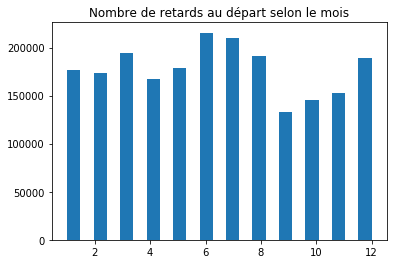

In [4]:
#Nombre de retards au départ par mois
Retard_mois = flights[(flights["DEPARTURE_DELAY"] > 0)]["MONTH"].value_counts()
print(Retard_mois)
plt.hist(flights[(flights["DEPARTURE_DELAY"] > 0)]["MONTH"],bins=23,histtype='barstacked')
#plt.pie(Retard_mois,labels = Retard_mois.index.tolist(),autopct='%1.1f%%')
plt.title("Nombre de retards au départ selon le mois")
plt.show()


7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64


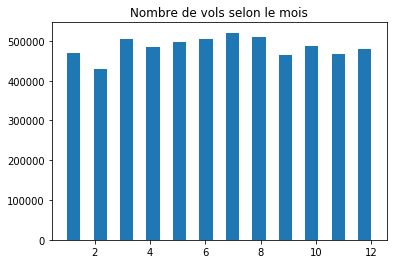

In [5]:
#A comparer au nombre de vols par mois
Vols_mois = flights["MONTH"].value_counts()
print(Vols_mois)
plt.hist(flights["MONTH"],bins=23,histtype='barstacked')
#plt.pie(Retard_mois,labels = Retard_mois.index.tolist(),autopct='%1.1f%%')
plt.title("Nombre de vols selon le mois")
plt.show()

4    334387
5    328846
1    323709
3    303044
7    301640
2    295772
6    238220
Name: DAY_OF_WEEK, dtype: int64


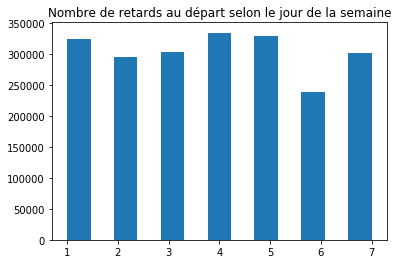

In [6]:
#Nombre de retards au départ par jour de la semaine
Retard_jour = flights[(flights["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"].value_counts()
print(Retard_jour)
#plt.pie(Retard_jour,labels = Retard_jour.index.tolist(),autopct='%1.1f%%',)
plt.hist(flights[(flights["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"],bins=13,histtype='bar')
plt.title("Nombre de retards au départ selon le jour de la semaine")
plt.show()

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64


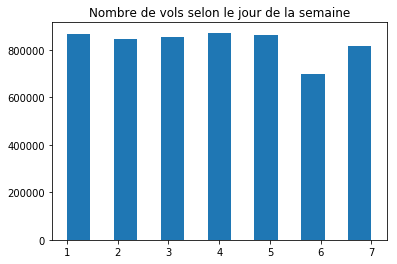

In [7]:
#A comparer au nombre de vols par jour de la semaine
Vols_jour = flights["DAY_OF_WEEK"].value_counts()
print(Vols_jour)
plt.hist(flights["DAY_OF_WEEK"],bins=13,histtype='bar')
plt.title("Nombre de vols selon le jour de la semaine")
plt.show()

In [ ]:
#Proportion de retards en fonction de l'heure de départ
P_Retard_jour = flights[(flights["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"].value_counts()
print(P_Retard_jour/flights["DAY_OF_WEEK"].value_counts())
plt.hist(P_Retard_jour/flights["DAY_OF_WEEK"].value_counts(),bins=13,histtype='bar')
plt.title("Nombre de retards au départ selon le jour de la semaine")
plt.show()


C:\Users\Thomas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Thomas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


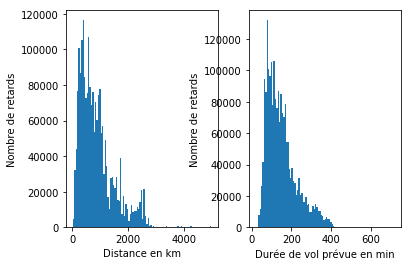

In [8]:
#Nombre de retards au départ en fonction de la distance
Retard_distance = flights[(flights["DEPARTURE_DELAY"] > 0)]["DISTANCE"]
Retard_temps_vol = flights[(flights["DEPARTURE_DELAY"] > 0)]["SCHEDULED_TIME"]
plt.subplot(1,2,1)
plt.hist(Retard_distance,bins=100,histtype='bar')
plt.xlabel("Distance en km")
plt.ylabel("Nombre de retards")
plt.subplot(1,2,2)
plt.hist(Retard_temps_vol,bins=100)
plt.xlabel("Durée de vol prévue en min")
plt.ylabel("Nombre de retards")
plt.show()

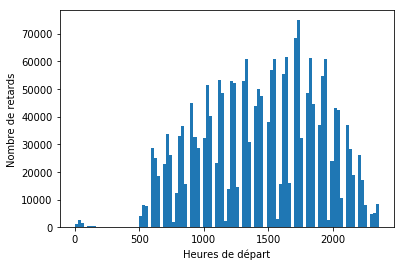

In [9]:
#Nombre de retards au départ en fonction de l'heure de départ
Retards_heure_depart = flights[(flights["DEPARTURE_DELAY"] > 0)]["SCHEDULED_DEPARTURE"]
plt.hist(Retards_heure_depart,bins=100,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de retards")
plt.show()

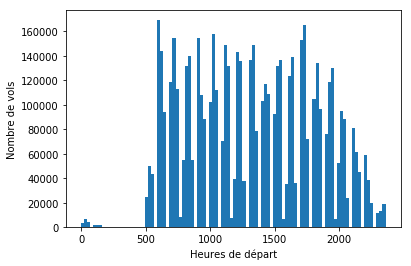

In [10]:
#A comparer avec le nombre de vols en fonction de l'heure de départ
Vols_heure_depart = flights["SCHEDULED_DEPARTURE"]
plt.hist(Vols_heure_depart,bins=100,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de vols")
plt.show()